In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [535]:
plt.rcParams['font.sans-serif'] = ['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [536]:
path = 'regress_data1.csv'
data = pd.read_csv(path)
data.head()

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [537]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


 看下数据长什么样子

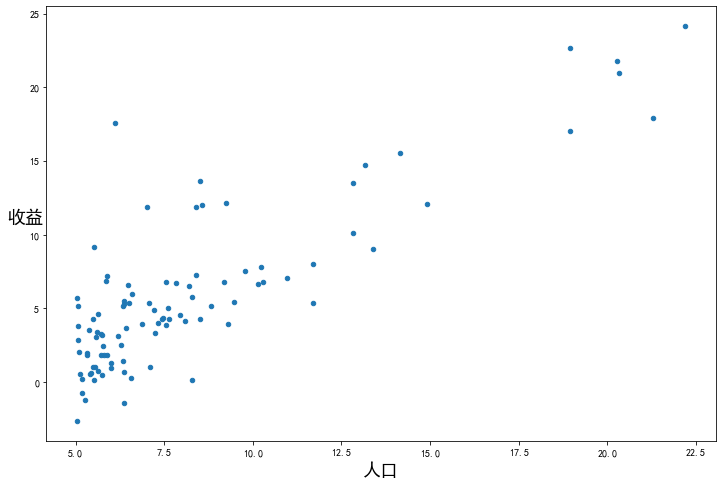

In [538]:
data.plot(kind='scatter',x='人口', y = '收益',figsize=(12,8))
plt.xlabel('人口',fontsize=18)
plt.ylabel('收益',rotation=0,fontsize=18)
plt.show()

现在我们使用梯度下降来实现线性回归,以最小代价函数

首先,我们将创建一个以参数$w$为特征函数的代价函数
$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[${{h}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}$]\\ 

In [539]:
def computeCost(X,y,w):
    inner = np.power(((X*w.T)-y), 2)
    return np.sum(inner)/(2*X.shape[0])

让我们在训练集中添加一列,以便我们可以使用向量化的解决方案来计算代价和梯度

In [540]:
data.insert(0,'ones','1')
data

,ones,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [541]:
cols = data.shape[1]# 三列
cols

3

In [542]:
X = data.iloc[:,:cols-1]
y = data.iloc[:,cols-1:]

In [543]:
X.head()

,ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [544]:
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化w。

In [545]:
X = np.matrix(X.values)
X = X.astype(np.float)
y = np.matrix(y.values)
y = y.astype(np.float)

<ipython-input-545-f3838f15c9a7>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.astype(np.float)
<ipython-input-545-f3838f15c9a7>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


In [546]:
y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


In [547]:
w = np.matrix(np.array([1,1]))
w = w.astype(np.float)

<ipython-input-547-d46f907f41fa>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = w.astype(np.float)


In [548]:
w

matrix([[1., 1.]])

In [549]:
X.shape,w.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [550]:

computeCost(X, y,w)

10.266520491383504

# Batch Gradient Decent(批量梯度下降法)
$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right)$$

In [551]:
def batch_grdientDescent(X, y,w ,alpha, iters):
    temp=np.matrix(np.zeros(w.shape))
    parameters = int(w.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * w.T) - y 

        for j in range(parameters):
            term =np.multiply(error,X[:,j])
            temp[0,j] = w[0,j] - ((alpha / len(X)) * np.sum(term))
        w = temp
        cost[i] = computeCost(X,y,w)

        return w, cost
        

In [552]:
alpha = 0.01
iters = 1000

In [553]:
w, cost = batch_gradientDescent(X, y, w, alpha, iters)
w

matrix([[-3.09481526,  1.11256796]])

In [554]:
computeCost(X,y,g)

4.535377341908056

绘制线性模型以及数据,直观地看出他的拟合

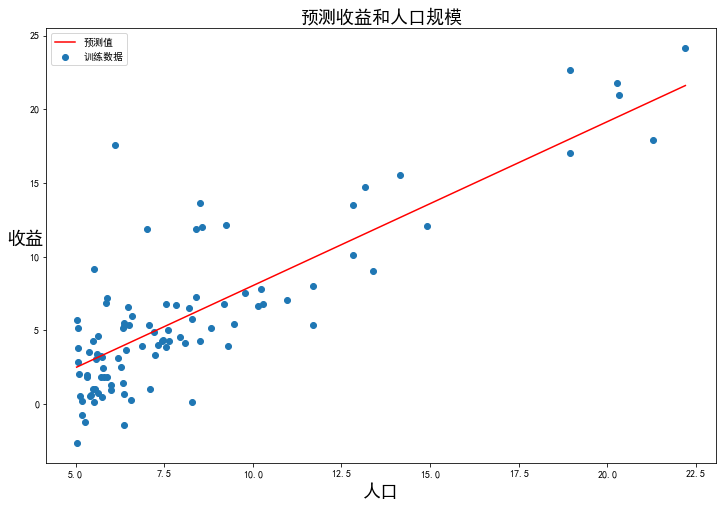

In [555]:
x = np.linspace(data['人口'].min(),data['人口'].max(),1000)
f = w[0,0]+(w[0,1] * x)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'],data['收益'],label = '训练数据')
ax.legend(loc='best')
ax.set_xlabel('人口',fontsize=18)
ax.set_ylabel('收益',rotation=0, fontsize = 18)
ax.set_title('预测收益和人口规模',fontsize=18)
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

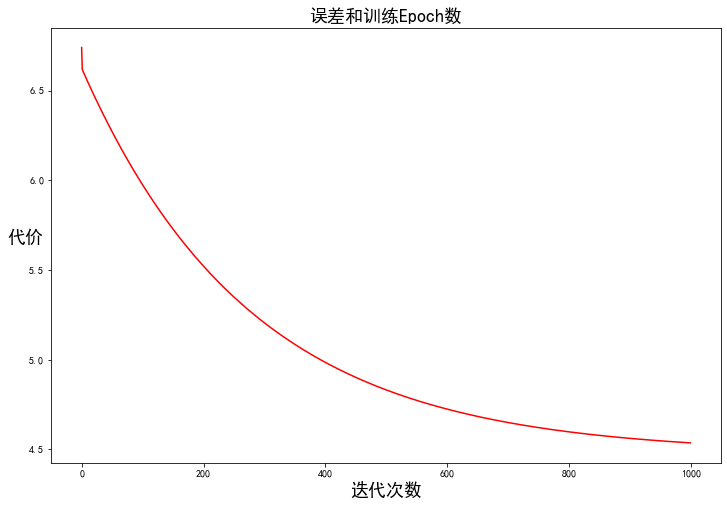

In [556]:
fig, ax = plt.subplots(figsize=(12, 8 ))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('迭代次数',fontsize=18)
ax.set_ylabel('代价',rotation=0,fontsize=18)
ax.set_title('误差和训练Epoch数',fontsize=18)
plt.show()

最小二乘法与梯度下降法比较:
|最小二乘法|梯度下降|
| :---| :---|
|不需要选择学率|需要选择学|
|一次运算得出结果|多次迭代|
|需要计算矩阵乘积求逆，如果特征数量较大，则运算代价大，因为矩阵求逆的时间杂的度$O(n^3)$|特征数量大时才能较好的适用|
|只用于线性模型，不适合逻辑回归等模型|适用于各种类型的模型|

## 多变量线性回归

练习还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [557]:
path = 'regress_data2.csv'
data2 = pd.read_csv(path)
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [558]:
data2 = (data2 - data2.mean()) /data2.std()
data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [559]:
# add ones column 
data2.insert(0,'Ones',1)


In [560]:
# set X (trainong data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]   

# convert to matrices and initialize theta 
X2 = np.matrix(X2.values)
X2 = X2.astype(np.float)
y2 = np.matrix(y2.values)
y2 = y2.astype(np.float)
w2 = np.matrix(np.array([0,0,0]))
w2  = w2.astype(np.float)
# perform linear regression on the data set
g2 ,cost2 = batch_gradientDescent(X2, y2, w2, alpha,iters)

# get the cost (error ) of the model 
computeCost(X2,y2,g2)


<ipython-input-560-84574c0b5139>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X2 = X2.astype(np.float)
<ipython-input-560-84574c0b5139>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y2 = y2.astype(np.float)
<ipython-input-560-84574c0b5139>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence

0.13070336960771892

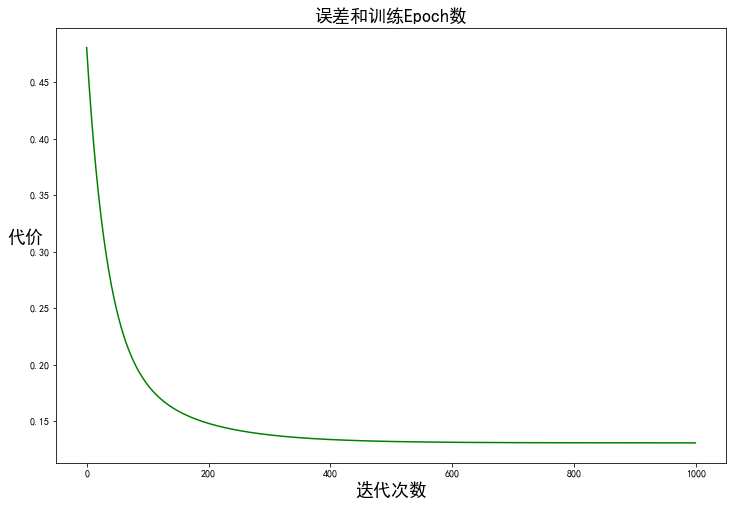

In [561]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'g')
ax.set_xlabel('迭代次数',fontsize=18)
ax.set_ylabel('代价',rotation=0,fontsize=18)
ax.set_title('误差和训练Epoch数',fontsize =18)
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [562]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

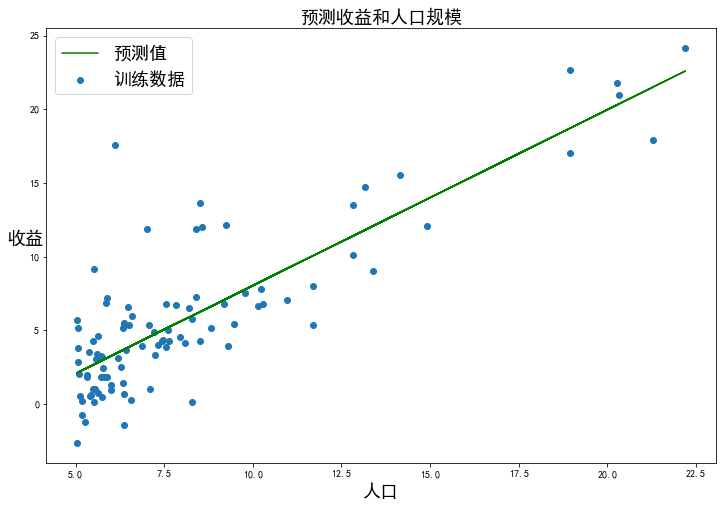

In [563]:
x = np.array(X[:,1].A1)# property matrix.A1 Return self as a flattened ndarray.
f  = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f,'g',label='预测值')
ax.scatter(data['人口'],data['收益'],label = '训练数据')
ax.legend(loc='best', fontsize=18)
ax.set_xlabel('人口',fontsize=18)
ax.set_ylabel('收益',rotation = 0, fontsize= 18)
ax.set_title('预测收益和人口规模',fontsize=18)
plt.show()

In [572]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)

Ridge()

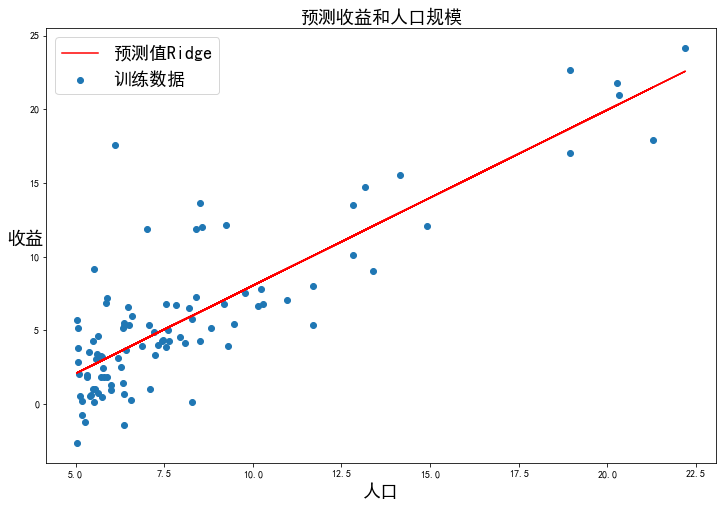

In [573]:
x2 = np.array(X[:, 1].A1)
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='预测值Ridge')

ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

In [566]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, y)

Lasso()

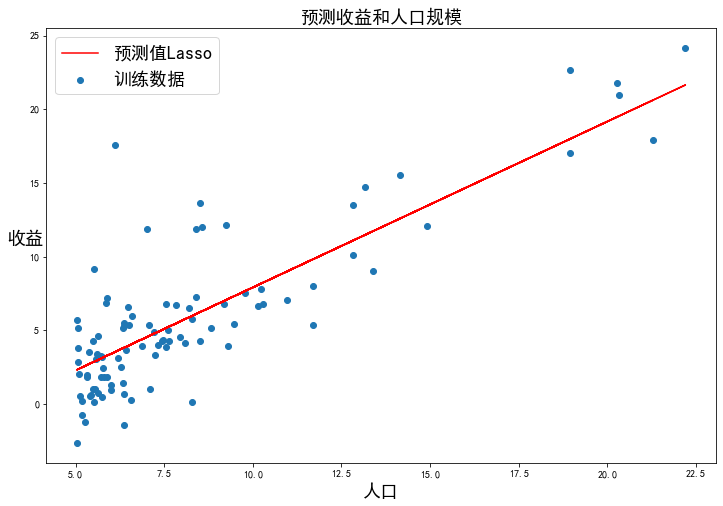

In [567]:
x3= np.array(X[:, 1].A1)
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Lasso')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

In [568]:
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

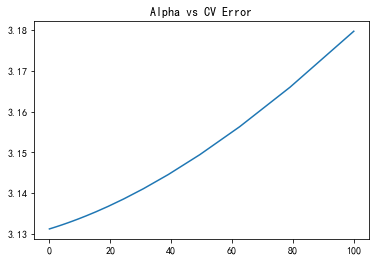

In [569]:
import matplotlib.pyplot as plt
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");
plt.show()

In [570]:
def LSM(X, y):
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w

In [571]:
final_w2=LSM(X, y)#感觉和批量梯度下降的theta的值有点差距
final_w2

matrix([[-3.89578088],
        [ 1.19303364]])


- 损失函数（Loss Function ）是定义在单个样本上的，算的是一个样本的误差。

-  代价函数（Cost Function ）是定义在整个训练集上的，是所有样本误差的平均，也就是损失函数的平均。

-  目标函数（Object Function）定义为：最终需要优化的函数。等于经验风险+结构风险（也就是Cost Function + 正则化项）

-  梯度下降法,作为机器学习中较为常用的算法,有三种形式:Batch Gradient Desent (BGD)、Stochastic Gradient Desent (SGD)、Mini-Batch Gradient(MBGD).MBGD是深度学习中进行模型训练的常客。
    - 首先,我们用只含一个特征的线性回归来展开。此时线性回归的假设函数为:
$$
h_{\theta}\left(x^{(i)}\right)=\theta_{1} x^{(i)}+\theta_{0}
$$
       其中 $i=1,2, \ldots, m$ 表示样本数。
       对应的目标函数 (代价函数) 即为:
$$
J\left(\theta_{0}, \theta_{1}\right)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}
$$
下图为 $J\left(\theta_{0}, \theta_{1}\right)$ 与参数 $\theta_{0}, \theta_{1}$ 的关系的图:
![](1.png)
###  1.Batch Gradient Desent,BGD
批量梯度下降法是最原始的形式,它是指在每一次迭代时使用所有样本来进行梯度的更新。从数学上理解如下:


 ① 对目标函数求偏导:
$$
\frac{\Delta J\left(\theta_{0}, \theta_{1}\right)}{\Delta \theta_{j}}=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$
其中 $i=1,2, \ldots, m$ 表示样本数， $j=0,1$ 表示特征数，这里我们使用了偏置项 $x_{0}^{(i)}=1$ 。 

 ② 每次迭代对参数进行更新:
$$
\theta_{j}:=\theta_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$
注意这里更新时存在一个求和函数，即为对所有样本进行计算处理，可与下文SGD法进行比较。

优点:

① 一次迭代是对所有样本进行计算,此时利用矩阵进行操作,实现了并行。

② 由于数据集确定的方向能够更好地代表样本总体,从而更准确地朝向极值所在的方向。当目标函数为凸函数时,BGD一定能够得到全局最优。

缺点:

① 当样本数目m很大时,每迭代一步都需要对所有样本计算,训练过程会很慢。 

### 2.Stochastic Gradient Descent,SGD
随机梯度下降法不同于批量梯度下降,随机梯度下降是每次迭代使用一个样本对参数进行更新。使得训练速度加快。

对于一个样本的目标函数为:
$$
J^{(i)}\left(\theta_{0}, \theta_{1}\right)=\frac{1}{2}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}
$$
① 对目标函数求偏导:
$$
\frac{\Delta J^{(i)}\left(\theta_{0}, \theta_{1}\right)}{\theta_{j}}=\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$
②  参数更新:
$$
\theta_{j}:=\theta_{j}-\alpha\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$


优点：

① 由于不是在全部训练数据上的损失函数,而是在每轮迭代中,随机优化某一条训练数据上的损失函数,这样每一轮参数的更新速度大大加快。

缺点:

①准确度下降。由于计算在目标函数为强凸函数的情况下,SGD仍旧无法做到线性收敛。 

②可能会收敛到局部最优,因为单个样本呢并不能代表全体样本的趋势。

③不易于并行实现。

### 3.Mini-Batch Gradient Desent,MBGD

小批量梯度下降,是对批量梯度下降以及随机梯度下降的一个折中办法。其思想是:每次迭代使用 **batch_size**个样本来对参数进行更新。

优点： 

①通过矩阵运算,每次在一个bacth上优化神经网络参数并不会比单个数据慢太多。

②每次使用一个batch可以大大减小收敛所需要的迭代次数,同时可以使收敛到的结果更加接近梯度下降的效果。

③可实现并行化。

 缺点：

① batch_size的不当选择可能会带来一些问题。